In [108]:
import glob, json, os
from PIL import Image
from tqdm import notebook
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

img_paths = glob.glob(r'.\imgs/*.png')
img_paths.sort()

img_paths

['.\\imgs\\img.png',
 '.\\imgs\\img_1.png',
 '.\\imgs\\img_2.png',
 '.\\imgs\\img_3.png',
 '.\\imgs\\img_4.png',
 '.\\imgs\\img_5.png']

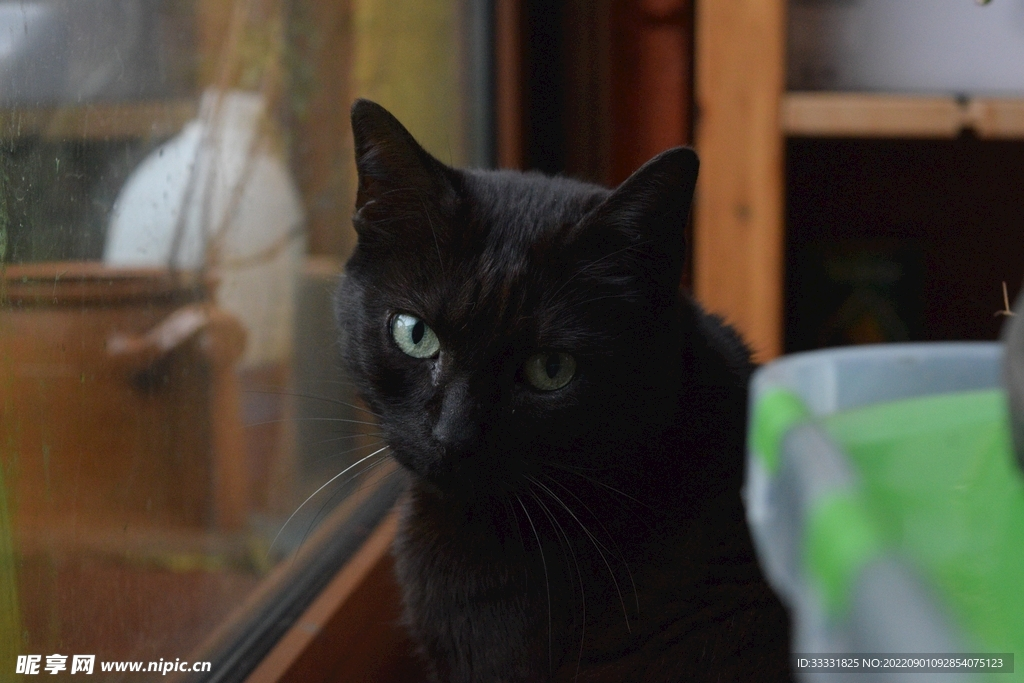

In [109]:
Image.open(img_paths[0])

# 加载CLIP模型

In [111]:
from PIL import Image
import requests
from transformers import ChineseCLIPProcessor, ChineseCLIPModel
import torch

model = ChineseCLIPModel.from_pretrained(r"E:\AGI\Models\chinese-clip-vit-base-patch16") # 中文clip模型
processor = ChineseCLIPProcessor.from_pretrained(r"E:\AGI\Models\chinese-clip-vit-base-patch16") # 预处理

# 图像编码

In [112]:
img_image_feat = []

imgs = [ Image.open(path) for path in img_paths]

inputs = processor(images=imgs, return_tensors="pt")
with torch.no_grad():
    image_features = model.get_image_features(**inputs)
    image_features = image_features.data.numpy()
    img_image_feat.append(image_features)
        
img_image_feat = np.vstack(img_image_feat)
img_image_feat = normalize(img_image_feat)

In [113]:
img_image_feat.shape # 20张图片 512 维度

(6, 512)

# 文本编码

In [114]:
def text_encode(query: str):
    img_texts_feat = []
    inputs = processor(text=[query], return_tensors="pt", padding=True)
    
    with torch.no_grad():
        text_features = model.get_text_features(**inputs)
        text_features = text_features.data.numpy()
        img_texts_feat.append(text_features)
            
    img_texts_feat = np.vstack(img_texts_feat)
    img_texts_feat = normalize(img_texts_feat)
    return img_texts_feat

# 尝试1：相似度计算

输入文本:  黑猫
(1, 512)


([], [])

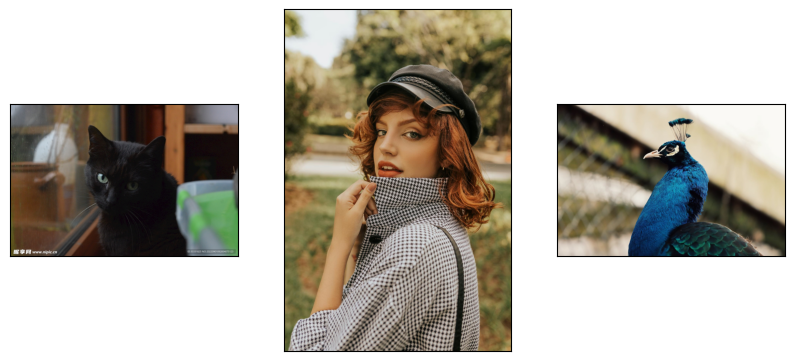

In [115]:
query: str = '黑猫'

print('输入文本: ', query)

img_texts_feat = text_encode(query)
print(img_texts_feat.shape)
sim_result = np.dot(img_texts_feat, img_image_feat.T).squeeze() # 矩阵计算
sim_idx = sim_result.argsort()[::-1][0:3]

plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(Image.open(img_paths[sim_idx[0]]))
plt.xticks([]); plt.yticks([])

plt.subplot(132)
plt.imshow(Image.open(img_paths[sim_idx[1]]))
plt.xticks([]); plt.yticks([])

plt.subplot(133)
plt.imshow(Image.open(img_paths[sim_idx[2]]))
plt.xticks([]); plt.yticks([])